In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Introduction
Logistic Regression is a classification method that is used to model data for binary classification purpose. It can be seen as an extension of linear regression, though in purely mathematical standpoint linear regession is derieved out of a Gaussian distribution whereas Logistic Regession comes from a Binomial Distribution. But it makes perfect sense to see it as an extension of Linear regression as the model definition seems to be quite similar. Lets me explain what I mean,

A simple linear regression equation for a data set with 2 predictors is given by:- 
$$h(x) = a*x_1 + b*x_2 + c$$
Where x_1 and x_2 are the 2 features available for each datapoint and a,b and c are the weights that we want to learn. It is easy to visualize that this same equation can be used to output probabilities in a classification problem, but a problem with this is that linear regression outputs values in the range of -Inf to +Inf whereas for probabilities we would like to restrict it between 0 and 1. Though a lot of functions can be used to restrict this range but the most common and frequent one is known as the sigmoid function. A sigmoid function is given by:
$$g(z) = {\frac{1}{1+e^{-x}}}$$

Visually it looks like:
![Sigmoid Function](SigmoidFunction.png)

So basically this maps the values produced by the linear regression function between 0 and 1. So a logistic regression equation looks like the following:
$$g(z) = {\frac{1}{1+e^{-h(x)}}}$$
where $h(x) = a*x_1 + b*x_2 + c$

## How does it work
Intuitively it makes sense that if we were to somehow get the correct values for parameters a, b and c we in essence have would have the equation that can generate the population from which our given sample was drawn from. The question now becomes how do we learn these parameters. 

A common method to estimate the values of such parameters is to either try to maximize or minimize a given value. For Logistic regression we want to maximize the likelihood of the class assignment to be correct. A common way to do this is to gradually update the parameters in order to maxime the likelihood of the correct class, this method is called gradient ascent. General purpose gradient ascent equation looks like:
$$\theta_j :=\theta_j +α \frac{∂}{∂\theta}J(\theta)$$
So basically in the equation above $J(\theta)$ represents the function whose value we want to maximize, which in our case will be the likelihood value. So, likelihood can be written as 
$$P(y=1|x) = g(x)$$
$$P(y=0|x) = 1−g(x)$$

It can be written more compactly as
$$p(y | x) = (g(x))^{y} (1 − g(x))^{1−y}$$

Before moving on, here’s a useful property of the derivative of the sigmoid function, which we write as g′:
$$g′(z) = \frac{d}{dz} \frac{1}{1+e^{−z}}$$
$$ = \frac{1}{(1 + e^{−z})^2}(e^{−z})$$
$$ = \frac{1}{(1 + e^{−z})}·(1 − \frac{1}{(1 + e^{−z})} )$$
$$ = g(z)(1 − g(z)).$$

Lets now continue with the derivation, we can then write down the likelihood of the parameters as
$$L(\theta) = p(y|X;\theta)$$
$$\prod_{1}^{m} p(y^{(i)} | x^{(i)}; \theta)$$
$$\prod_{1}^{m} g(x^{(i)})^{y^{(i)}}  1 − g(x^{(i)})^{1−y^{(i)}}$$

It will be easier now if try and maximize log likelihood instead of likehood
$$l(\theta) = log L(\theta)$$
$$=\sum_{i}^{m}y^{(i)} log g(x^{(i)}) + (1 − y^{(i)}) log(1 − g(x^{(i)}))$$

lets now take the derivative to derive the gradient ascent rule
    $$\frac{∂}{∂\theta} l(\theta) =  y\frac{1}{g(\theta^Tx)} −(1−y)\frac{1}{1 − g(\theta^Tx)})\frac{∂}{∂ \theta j}g(\theta^Tx)$$
    $$ = (y\frac{1}{g(\theta^Tx)} −(1−y)\frac{1}{(1−g(\theta^Tx)})g(\theta^Tx)(1 − g(\theta^Tx))\frac{∂}{∂ \theta j}\theta^Tx $$
    $$ = (y(1−g(\theta^Tx))−(1−y)g(\theta^Tx))x_j$$
    $$ = (y−g(\theta^Tx))x_j$$

Solving some mathematical formulas we get the following weight update equation:
$$ \theta_j :=\theta_j + \alpha (y^{(i)} − g(x^{(i)})) x^{(j)}$$
 
where $\theta_j$ is the jth weight parameter and $y^{(i)}$ and $x^{(i)}$ represents the ith data sample. The full mathematical equation is worked below. 

## Use case
Logistic regression is a parametric model which means it can be used to draw inferences from a given dataset. For example if we have a dataset about whether a person has a given disease or not along with a lot of information about that person like their dietary habits, their Hygiene condition, the medication they use and so on and so forth. Then in addition to predicting whether a new person will get that disease or not we can also see and understand which are the factors that most contribute towards the detection of the disease and come up with appropriate preventive measures.

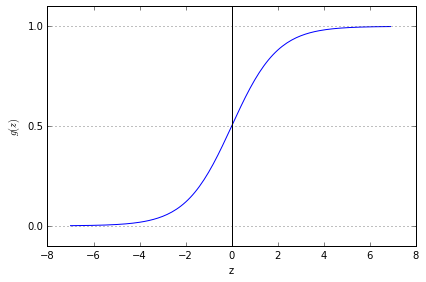

In [3]:
# Helper code used to generate the graph for the sigmoid function
# Sigmoid Function Generation
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

z = np.arange(-7, 7, 0.1)
gx = sigmoid(z)

plt.plot(z, gx)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$g (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()